In [1]:
#importing the data_process file which includes data preprocessing functions
from data_preprocess import*

#Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading the dataset ( Load "Recipes.Csv" -"Defects.csv")
recipes = pd.read_csv("Recipes.csv")
defects = pd.read_csv("Defects.csv")

In [3]:
#recipes
#defects

In [4]:
#calling the preprocess functions from data_process
df = preprocess(recipes, defects)
df = organize_data(df)

In [5]:
df

,HEAT_ID,112,113,114,115,116,117,118,119,120,...,209,210,211,212,213,214,215,Sum,DEFECT_TYPE,DEFECT_GROUP_ID
67441,1703812,0.0,36992.8,4464.7,4394.9,0.0,39518.8,0.0,1548.6,4581.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154984.6,169,OTH
411948,1804588,0.0,48619.3,0.0,0.0,0.0,68258.9,0.0,0.0,4386.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152724.7,89,SH
381836,1803088,0.0,31481.6,4247.0,0.0,0.0,34493.0,0.0,0.0,4418.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148506.2,148,DM
462999,1809288,0.0,35656.9,4489.7,0.0,0.0,23665.3,10632.7,0.0,0.0,...,0.0,0.0,0.0,0.0,4381.7,4291.9,0.0,146596.3,150,DM
146607,1708742,0.0,48943.1,0.0,8910.8,9220.6,0.0,0.0,0.0,4603.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149959.4,190,DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264373,1715634,0.0,23979.6,0.0,0.0,0.0,39993.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147658.1,183,OTH
291574,1716704,0.0,26098.4,4099.6,8832.8,0.0,30408.4,0.0,0.0,4245.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158939.5,182,OTH
491995,1810560,0.0,35545.8,8553.9,0.0,0.0,40991.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4467.9,0.0,0.0,152838.2,212,OTH
41742,1702764,0.0,45151.1,6128.0,0.0,0.0,17768.1,0.0,7872.1,5113.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139845.3,90,SH


In [6]:
# Taking Unique mat_code as an array in 'mat'.....

mat = recipes.Material_Code.unique()
print(mat)

[112 113 115 114 117 119 121 126 124 120 116 180 166 183 182 190 181 122
 125 118 208 209 207 210 211 215 212 214 213]


In [12]:
#x=df.iloc[S_row:E_row, S_0:_E_31].values
x=df.iloc[:, 0:31].values # Features
y=df.iloc[:, 32].values #Target/label

#Split train_test samples,test size =20% of the orginal data...test_size = 0.20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [15]:
x

array([[1703812. ,       0. ,   36992.8, ...,       0. ,       0. ,
         154984.6],
       [1804588. ,       0. ,   48619.3, ...,       0. ,       0. ,
         152724.7],
       [1803088. ,       0. ,   31481.6, ...,       0. ,       0. ,
         148506.2],
       ...,
       [1810560. ,       0. ,   35545.8, ...,       0. ,       0. ,
         152838.2],
       [1702764. ,       0. ,   45151.1, ...,       0. ,       0. ,
         139845.3],
       [1704390. ,       0. ,   38861.6, ...,       0. ,       0. ,
         145195.9]])

In [9]:
y

array(['OTH', 'SH', 'DM', ..., 'OTH', 'SH', 'OTH'], dtype=object)

In [16]:
# fitting the traing set to the Classifier 
classifier = RandomForestClassifier(max_depth=5, n_estimators=200)
classifier.fit(x_train, y_train)

#Per. the predictions
y_pred = classifier.predict(x_test)

#Calculation the accuracy_score 
scr = accuracy_score(y_test, y_pred)
print(np.round(scr*100))

43.0


In [11]:
# save the model to disk using pickle 
import pickle
filename = 'finalized_model.sav'

pickle.dump(classifier, open(filename, 'wb'))

In [12]:
#comparison of 4 more classifier with hyper parametr tuning
#Also calculating the confussion matrix and Acc, Pre,Recall
names = ["Logistic Regression", "Random Forest", "KNN Classifier", "Decision Tree"]


classifiers = [
    LogisticRegression(solver='sag'),
    RandomForestClassifier(max_depth=5, n_estimators=200),
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    ]

for name, clf in zip(names, classifiers):
    print("=================",name,"====================")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #report can print out
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(name,' accuracy is',accuracy_score(y_pred,y_test))
    print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
    print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

    print('F1 score is ',f1_score(y_test, y_pred), average='micro')

================= Logistic Regression ====================


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        CCTO       0.00      0.00      0.00       210
          DM       0.41      0.22      0.29      6447
          EQ       0.00      0.00      0.00       195
         IDF       0.00      0.00      0.00        26
         MET       0.00      0.00      0.00      1310
         OTH       0.42      0.82      0.56      7274
          PK       0.00      0.00      0.00         2
          PR       0.00      0.00      0.00        28
          SH       0.00      0.00      0.00      1074
          SU       0.00      0.00      0.00       939

    accuracy                           0.42     17505
   macro avg       0.08      0.10      0.08     17505
weighted avg       0.33      0.42      0.34     17505

[[   0   27    0    0    0  183    0    0    0    0]
 [   0 1420    0    0    0 5027    0    0    0    0]
 [   0   15    0    0    0  180    0    0    0    0]
 [   0    6    0    0    0   20    0    0    0    0]
 [   0  186    0    0    0 11

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Recall Score :  0.4221079691516709
================= Random Forest ====================


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        CCTO       0.00      0.00      0.00       210
          DM       0.44      0.26      0.33      6447
          EQ       0.00      0.00      0.00       195
         IDF       0.00      0.00      0.00        26
         MET       0.00      0.00      0.00      1310
         OTH       0.43      0.82      0.57      7274
          PK       0.00      0.00      0.00         2
          PR       0.00      0.00      0.00        28
          SH       0.00      0.00      0.00      1074
          SU       0.00      0.00      0.00       939

    accuracy                           0.44     17505
   macro avg       0.09      0.11      0.09     17505
weighted avg       0.34      0.44      0.36     17505

[[   0    5    0    0    0  205    0    0    0    0]
 [   0 1673    0    0    0 4774    0    0    0    0]
 [   0    6    0    0    0  189    0    0    0    0]
 [   0    5    0    0    0   21    0    0    0    0]
 [   0  168    0    0    0 11

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Recall Score :  0.43507569265924023
================= KNN Classifier ====================


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        CCTO       0.07      0.06      0.07       210
          DM       0.32      0.46      0.38      6447
          EQ       0.06      0.02      0.02       195
         IDF       0.00      0.00      0.00        26
         MET       0.09      0.04      0.05      1310
         OTH       0.36      0.35      0.36      7274
          PK       0.00      0.00      0.00         2
          PR       0.00      0.00      0.00        28
          SH       0.00      0.00      0.00      1074
          SU       0.15      0.05      0.08       939

    accuracy                           0.32     17505
   macro avg       0.11      0.10      0.10     17505
weighted avg       0.29      0.32      0.30     17505

[[  13  113    0    0    3   70    0    0    1   10]
 [  58 2971   25    1  190 3065    0    0   26  111]
 [   5  103    3    0    3   75    0    0    0    6]
 [   1   17    0    0    0    8    0    0    0    0]
 [   6  617    2    1   49  6

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Recall Score :  0.32333618966009714
================= Decision Tree ====================


C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        CCTO       0.00      0.00      0.00       210
          DM       0.43      0.29      0.34      6447
          EQ       0.00      0.00      0.00       195
         IDF       0.00      0.00      0.00        26
         MET       0.00      0.00      0.00      1310
         OTH       0.44      0.79      0.56      7274
          PK       0.00      0.00      0.00         2
          PR       0.00      0.00      0.00        28
          SH       0.00      0.00      0.00      1074
          SU       0.00      0.00      0.00       939

    accuracy                           0.43     17505
   macro avg       0.09      0.11      0.09     17505
weighted avg       0.34      0.43      0.36     17505

[[   0   20    0    0    0  190    0    0    0    0]
 [   0 1850    0    0    0 4597    0    0    0    0]
 [   0   19    0    0    0  176    0    0    0    0]
 [   0    6    0    0    0   20    0    0    0    0]
 [   0  217    0    0    0 10

C:\Users\rahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Seaborn visulization

In [10]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,   10,    0,    0,    0,  198,    0,    0,    0,    0],
       [   0, 1679,    0,    0,    0, 4801,    0,    0,    0,    0],
       [   0,   15,    0,    0,    0,  165,    0,    0,    0,    0],
       [   0,    9,    0,    0,    0,   17,    0,    0,    0,    0],
       [   0,  197,    0,    0,    0, 1135,    0,    0,    0,    0],
       [   0, 1311,    0,    0,    0, 5914,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    3,    0,    0,    0,   26,    0,    0,    0,    0],
       [   0,  615,    0,    0,    0,  488,    0,    0,    0,    0],
       [   0,   61,    0,    0,    0,  860,    0,    0,    0,    0]],
      dtype=int64)

Text(70.0, 0.5, 'Truth')

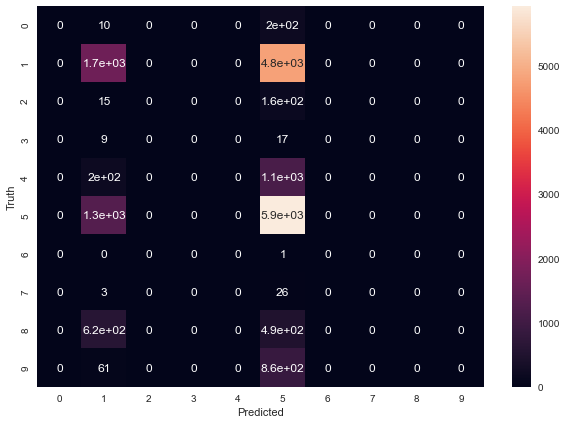

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')